In [65]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

## noise 추가 하기 전 데이터

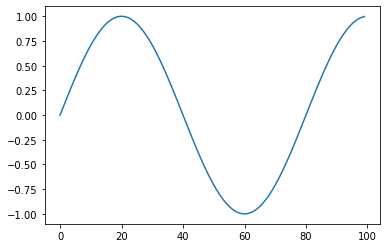

In [66]:
data = np.sin(np.pi * np.arange(0, 100)*2.025)
plt.plot(data)

## noise data 

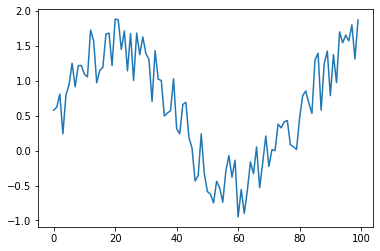

In [67]:
data = np.sin(np.pi * np.arange(0, 100)*2.025) + np.random.random(100)
plt.plot(data)

## 학습 시킬 데이터 len(900) 으로 만들기

x_train[0] : data[0],data[1],~,data[9]  y_train[0] : data[10]

x_train[1] : data[1],data[2],~,data[10]  y_train[1] : data[11]

~ ~ ~

 x_train[69] : data[69],data[70],~,data[78]  y_train[69] : data[79]

----------------------------------------------------

x_test[0] : data[70],data[71],~,data[79]  y_test[0] : data[80]

x_test[1] : data[71],data[72],~,data[80]  y_test[1] : data[81]

~ ~ ~

x_test[19] : data[89],data[90],~,data[98]  y_test[19] : data[99]

In [95]:
x = np.array([data[i+j] for i in range(len(data)-10) for j in range(10)])
x_train = x[:700].reshape(-1,10,1)
x_test = x[700:].reshape(-1,10,1)

y = np.array([data[i+10] for i in range(len(data)-10)])
y_train = y[:70].reshape(-1, 1)
y_test = y[70:].reshape(-1,1)

## model training

In [38]:
model = models.Sequential()
model.add(layers.SimpleRNN(8, input_shape = (10,1)))
model.add(layers.Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x_train, y_train, epochs =400, verbose=0)

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [39]:
y_predict = model.predict(x_test)

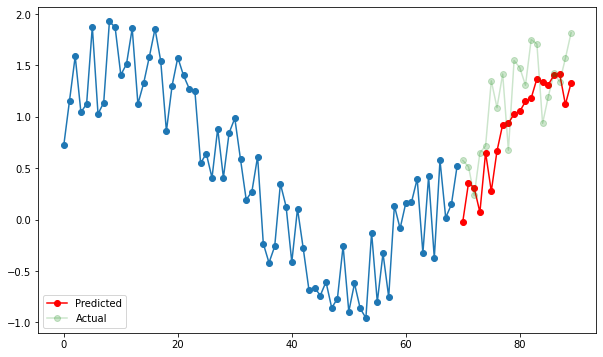

In [40]:
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_predict))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(70,), 'o-')
plt.plot(b_axis, y_predict.reshape(20,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(20,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()